In [1]:
# SET UP (it will take a long time to run)
using Pkg; Pkg.activate("C:/Users/nicot/GitHub/Heterogeneous Agents/notebooks/")
using Plots; using Interpolations; using LinearAlgebra; using Optim;
gr(fmt=:png);
Pkg.status()

  Activating environment at `C:\Users\nicot\GitHub\Heterogeneous Agents\notebooks\Project.toml`

      Status `D:\GitHub\Heterogeneous Agents\notebooks\Project.toml`
  [17a596ad] ChebyshevApprox v0.1.12
  [35d6a980] ColorSchemes v3.15.0
  [31c24e10] Distributions v0.25.11
  [a98d9a8b] Interpolations v0.13.4
  [0db19996] NBInclude v2.2.0
  [429524aa] Optim v1.4.1
  [d96e819e] Parameters v0.12.2
  [91a5bcdd] Plots v1.20.1
  [08abe8d2] PrettyTables v1.1.0
 

 [d330b81b] PyPlot v2.10.0
  [f2b01f46] Roots v1.2.0
  [fd094767] Suppressor v0.2.0
  [239c3e63] Vega v2.3.0
  [37e2e46d] LinearAlgebra


# Heterogeneous Agent Model 2

- 2 Idiosyncratic shocks:
    1. over firms' TFP
    2. over households employment status
- 2 Financial frictions:
     1. limited diversification
     2. debt limit


Individuals variables are in lowercase (when it's needed I will add to the notation the subindex $j$ for firms' variables and $i$ for households' variables).

### Firms

There is a continuum of firms aligned in a torus made of the interval $[0\, , \, 1]$. Each firm production function is:
$$
y(z,k,l)=z(\theta) k^\alpha l^{1-\alpha}
$$

Every period each firm is subject to an idiosyncratic discrete shock (not correlated with the past shock). The firms $j$ total factor productivity $z_j$ is represented by:
$$
z_j(\epsilon_t^j)=Z \epsilon_t^j
$$

From the firm's perspective, the idiosyncratic shock  is a random variable $\theta_t^j$  that has a value $\theta_h \in (1,1/p)$ with probability $p$ and a value $\theta_l = (1- \theta_h p)/(1-p) $ with probability $(1-p)$.

Wages are settled before production which implies that every firm pays the same wage $w$. Therefore $w=E[PMgL_j(k_j,l_j)]$ (normalizing output's price to one). Since every employed households offer inelastically one unit of labor each we have: $W_t=(1-\alpha)z_t(k_t/L_t)^\alpha$

Arbitrary condition impose expected retribution to capital to be the same for every firm, which means that every firm will received the same amount of capital. However, actual retribution to capital will be known after production (after the investment decision was done), that means actual retribution to capital is a random variable. The total return paid by firm $j$ is $R_j(\theta_t^j)=y_j(\theta_t^j)-w$, simplifying the notation that is: $R_j(\theta_t^j)=Z (\theta_t + \alpha -1) K^\alpha$. Then the return per unit of capital ($R_j=1+r_j$) is:

\begin{equation*}
R_j(\theta)=Z (\theta + \alpha -1) (K/L)^{\alpha-1}
\end{equation*}

Let's define $\bar{R}\equiv \alpha Z K^{\alpha-1} $. And add the restriction $\theta_l > 1 - \alpha$

#### Limited diversification

Firms finance their capital input by selling equity. However equity cannot be fully diversified, that is I introduce a friction in the financial market that limits diversification. Savers cannot buy as many types of equity as they want, they can only buy an asset made of equals amount of equities from $d$ types of firms. From a broad point of view we can think of $\theta_t$ as uniformed random variable in the interval $[0,1]$ that produces a shock of length $p$. Recall, firms are located in a torus, say a circumference, therefore the circumference is divided in two segments: one with $\theta_h$ and one with $\theta_l$. In this example I will restrict $d=2$ to make it easier, that is the asset is compound by equities from two random points of the circumference.

Then, there are three states for the return of the $d$-equities compound asset $a$, $R(\theta_t)$, as:

\begin{split}
R_{l}=Z (\theta_l + \alpha -1) (K/L)^{\alpha-1} \;\;\;\;\text{with probability}\; (1-p)^2 \\
R_{m}=Z ((\theta_l+\theta_h)/2 + \alpha -1) (K/L)^{\alpha-1}  \;\;\;\;\text{with probability}\; 2 p(1-p) \\
R_{h}=Z (\theta_h + \alpha -1) (K/L)^{\alpha-1}  \;\;\;\;\text{with probability} \; p^2
\end{split}


Why the torus? Let suppose someone buys a large quantity of one asset, say $a>2K$, where $K$ is the aggregate capital, if this financing money went to just two firms, they would have a higher asset stock than most firms. However, if the excess capital is destined to their closed neighbors the asymmetry of capital inputs is avoided, while it is ensured that there is no extra diversification since closed neighbor firms are closed enough that the remains in the same part of the circumference.

Also, notice that decreasing marginal productivity induce capital allocation to spread out across firms. Simply put, savers won't buy an asset made from firms which their equities are yielding a lower rate of return than others, that is won't buy assets of firms that already received $K$, if there is a firm with less than average amount of capital yet (basic equilibrium concept).

### Households

There is a continuum of households aligned in the interval $[0\; , \; 1]$. Households are subject to an idiosyncratic employment shock, that follows a two state markov process $\epsilon_t\in\{e,u\}$ (employed, unemployed). Households supply labor inelastically (household $i$ supplies $\epsilon_t^i$ at period $t$, e.g.)

Therefore, aggregate stationary employment is determined by the probabilities of the markov process: 
$$N_{ss}=\Pr(\epsilon'=e|u)\,/\,\big[Pr(\epsilon'=u|e)+Pr(\epsilon'=e|u)\big]$$

Household also like to consume and to save. Consumptions preferences are defined by the instantaneous utility function: $u(c)=1-1/c$, and the intertemporal discount factor $\beta$. Savings is done by purchasing the partially diversified portfolios defined above.

If a household is employed, she receives a wage $w$, if she is not, she receives an employment compensation from the government $s$. Also she has to pay income taxes (except for the employment compensation $s$) . Therefore, at time $t$ they face the following restrictions:

$$
c_t+a_t \leq \epsilon_t w (1-\tau) + (1-\epsilon_t)b + a_{t-1}R(\theta _t)(1-\tau)
$$

$$
a_t \geq 0
$$

Euler equation is:

$$
UMg[c_t(\epsilon_t,\theta_t)]=\beta (1-\tau) E\{R(\theta_{t+1})UMg[c_{t+1}(\epsilon_{t+1},\theta_{t+1})]\}
$$

### Government

Finally, the government simple redistributes incomes by taxing revenues from labor and capital and paying employment compensations. I maintains a 0 deficit policy which implies:

\begin{equation*}
\tau\int_0^1 \Big[\,  R(\theta_t^i)a^i_t + w_t \epsilon_t^i \,\Big] \text{d}i = b_t (1-N_{ss})
\end{equation*}

$$
\tau y(Z_t,K_t,N_{ss}) = b_t (1-N_{ss})
$$

What if someone is unemployed and she is in the borrowing limit? Her income would be $a_{min}+a_{min}r(K,\theta)(1-\tau)+s(K)$. Since $c\geq 0$  we can conclude that $a_{min}+a_{min}r(K,\theta)(1-\tau)+s(K) \geq a'$.

And since, $a'\geq a_{min}$ we have $a_{min}+a_{min}r(K,\theta)(1-\tau)+s(K) \geq a_{min}$ for all $\theta$.
That implies, $a_{min}\geq-s(K)/\big(r(K,\theta)(1-\tau)\big)$.

Therefore, I redefine the stationary borrowing limit as $a_{min}(K)=max\big\{\frac{-s(K)}{r(K,\theta_l)(1-\tau)}\,,\,a_{min}^*\big\}$.


In [12]:
# STEP 1: Parameters

Pε = [0.9565 0.0435; 0.5 0.5 ]  # 𝜖=1 empleado, 𝜖=2 desempleado; la fila me dice dónde estoy, la columna a dónde puedo ir
γ = 2.0
α = 0.36
δ = 0.005
β = 0.96
a_minp = 0.0 # a_min parameter
ratio_s = 0.256
Nss=Pε[2,1]/(Pε[2,1]+Pε[1,2])


Z = 1.0
p = 0.7
@show θh = 0.05 #((K/Nss)^(1-α) * δ/Z - α) * (1-p) / p 
θl = - p*θh/(1-p)
θm = (θh + θl)/2
pl = (1-p)^2
pm = 2*p*(1-p)
ph = p^2
Pr = [pl pm ph]
@show sum(Pr)

rl(K) = Z * (K/Nss)^(α-1) * (α + θl) - δ
rm(K) = Z * (K/Nss)^(α-1) * (α + θm) - δ
rh(K) = Z * (K/Nss)^(α-1) * (α + θh) - δ
r(K)  = Z * (K/Nss)^(α-1) * α - δ

Y(K) = Z*K^α*Nss^(1-α)
f(K) = Y(K)+(1-δ)*K
w(K) = (1-α)*Z*(K/Nss)^α
s(K) = ratio_s * w(K)
τ(K) = s(K) * (1-Nss) / (Nss*w(K)+K*r(K))
a_min(K) = max(a_minp,-s(K)/((1-τ(K))*rl(K)))   # En rigor es irrelevante porque en este modelo a_minp=0

u(c) = γ==1.0 ?  log(c)  :  c^(1-γ)/(1-γ)
UMg(c) = c^(-γ)
UMg_inv(umg) = umg^(-1/γ)

θh = 0.05 = 0.05
sum(Pr) = 1.0


UMg_inv (generic function with 1 method)

The basic steps in the computation of the stationary distribution consists of an outer and inner loop. In the outer loop, we compute the aggregate capital stock and, hence, the factor prices and unemployment compensation.

In the inner loop, we use the prices to compute the optimal policy function of the household using EGM. Then we compute the transition probability matrix having asset $a'$ at state $(\epsilon',\theta')$ at next period given that current period is $a$ $\epsilon, \theta$. Finally we find the stationary distribution for $a$ and the aggregate capital.

Therefore we start with a first guess for $K_0$. This could be the stationary value for the representative agent problem, for example.

In [13]:
# STEP 2: First guess for K

#RA_eq = optimize(K -> ( β * (1 + r(K) * (1-τ(K))) -1 )^2 , 150, 300)
#K_RA = RA_eq.minimizer
#println("Steady-state value of capital K for RA model is $(K_RA)")
#K_0 = 245.3

@show K_0 = Nss*((α/(1/β-1+δ)))^(1/(1-α))  # 247.62

@show r_0 = [rl(K_0) rm(K_0) rh(K_0)]
rE_0 = r(K_0)
@show w_0 = w(K_0)
@show s_0 = s(K_0)
@show τ_0 = τ(K_0)
@show a_min_0 = a_min(K_0)

@show Nss*w_0+K_0*r(K_0)
@show Y(K_0)-δ*K_0
@show rE_0
@show sum( r_0 .* Pr )
;

K_0 = Nss * (α / ((1 / β - 1) + δ)) ^ (1 / (1 - α)) = 22.395977273268073
r_0 = [rl(K_0) rm(K_0) rh(K_0)] = [0.026543209876543256 0.03734567901234574 0.048148148148148225]
w_0 = w(K_0) = 2.019685820116113
s_0 = s(K_0) = 0.517039569949725
τ_0 = τ(K_0) = 0.014825937592867761
a_min_0 = a_min(K_0) = 0.0
Nss * w_0 + K_0 * r(K_0) = 2.791202352761007
Y(K_0) - δ * K_0 = 2.7912023527610073
rE_0 = 0.041666666666666734
sum(r_0 .* Pr) = 0.04166666666666673


EGM works with the Euler equation instead of the value function, and as VFI this method operates backwards, from $a'$ to $a$. Combining the envelope condition with the FOC (Euler) and rearranging, we have:

$$
y(a,\epsilon,\theta,K)=\big(UMg\big)^{-1}\Big\{\beta\;\mathbb{E}\Big[\,R(\theta',K)(1-\tau(K))\,UMg\Big(y(a',\epsilon',\theta',K)-g_n(a',\epsilon',K)\Big)\Big)\,|\,\epsilon\,\theta\,\Big]\Big\} + a'
$$ 

Since $y$ is invertible (not an actual requirement) we have:

$$
a= g_{n+1}^{-1}\big(a',\epsilon,\theta, K;g_n\big)
$$

We can define that function as an interpolation that maps a value of $a$ for each point in the two dimension grid for $a'$, $\epsilon$ and $\theta$. That interpolation is $g_{n+1}^{-1}$. Since interpolation are easily inverted one can do so, and find a new policy function without any root finding.


The steps of EGM for this problems are

1. Compute next period consumption with previous iteration policy function and wealth for each $a'$ and $\epsilon'$ (matrix $6 \times N_A$).
2. Compute current period consumption (requires to apply $\mathbb{E}(|\epsilon,\theta)$, $UMg$ and $UMg^{-1}$ to the matrix).
3. Compute current period asset. The resulting grid for $a$ (a matrix actually) is endogenous.
4. Create an interpolation from the resulting $a$ matrix ($6\times N_A$) mapping to the originally $a'$ matrix.


Nota:

¿Qué hacer si el consumo del próximo período dada la función de política $g_n$ es negativo para algún estado $(a,\epsilon,\theta)$ ?

Aunque para algunas funciones de utilidad marginal esto se puede computar, para otras no. Opté por imponer $c'>0$.

Esto no debería ser necesario, porque esos casos no deberían formar parte de la solución del problema de maximización, es decir la restricción $c_t\geq0$ no debería ser vinculante. El problema es que al poner una función de política cualquiera para empezar no siempre funciona.

Hay que testear que la función de política final (luego de las iteraciones) cumpla con $c'>0$ sin necesidad de imponerselo luego.

In [14]:
# Definning the asset grid
a_max = 250
a_n = 200

# Asset grid (uneven knot distributions, more at the begining)
A_grid = collect(range(0, stop=(a_max-a_min_0)^(0.5), length=a_n)).^2 .+ a_min_0
    
# Asset matrix (same rows)
A_mat = repeat(A_grid, outer=[1, 6])'

6×200 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.00631297  0.0252519  0.0568167  …  242.519  245.0  247.494  250.0
 0.0  0.00631297  0.0252519  0.0568167     242.519  245.0  247.494  250.0
 0.0  0.00631297  0.0252519  0.0568167     242.519  245.0  247.494  250.0
 0.0  0.00631297  0.0252519  0.0568167     242.519  245.0  247.494  250.0
 0.0  0.00631297  0.0252519  0.0568167     242.519  245.0  247.494  250.0
 0.0  0.00631297  0.0252519  0.0568167  …  242.519  245.0  247.494  250.0

In [15]:
function EGM(g::Function, r::Array, w::Float64, τ::Float64, s::Float64, a_min::Float64, Pε, Pr, a_mat, a_grid)
    
    # Computing next period consumption using the old policy functions
    C_next = similar(a_mat)
    for ε in 0:1    # ε=0 empleado    ;    ε=1 desempleado
        for θ in 1:3
            C_next[3*ε+θ, :] =  a_grid.*(1 .+r[θ]*(1-τ)) .+ w*(1-ε)*(1-τ) .+ s*ε .- max.(a_min, g.(a_grid,θ,ε))
        end
    end
    #C_next=max.(C_next,1e-10)

    # Right side Euler's equation: Expectation conditional to ε'
    right_E0 =  β * (Pr.* (1 .+r*(1-τ)) ) * UMg.(C_next[1:3,:]) # empleado 
    right_E1 =  β * (Pr.* (1 .+r*(1-τ)) ) * UMg.(C_next[4:6,:]) # desempleado
    # Right side Euler's equation: Expectation conditional to ε
    right_E = Pε * [right_E0; right_E1]
    
    # Current period consumption
    C = UMg_inv.(right_E)
    
    # Current period assets holdings
    A = similar(a_mat)
    for ε in 0:1
        for θ in 1:3
            A[3*ε+θ, :] = ( a_grid + C[ε+1,:] .- w*(1-ε)*(1-τ) .- s*ε ) ./ (1 .+r[θ]*(1-τ)) #########
        end
    end

    # Permutations to sort data in increasing order:
    perm = fill(0,(6,length(a_grid)))
    for ε in 0:1
        for θ in 1:3
            perm[3*ε+θ,:] =  sortperm(A[3*ε+θ, :])
        end
    end

    # Interpolation a' to get a function a'=g(a,θ,ε)
    gle_ip = LinearInterpolation(A[1, perm[1,:]], a_grid[perm[1,:]], extrapolation_bc=Line())
    gme_ip = LinearInterpolation(A[2, perm[2,:]], a_grid[perm[2,:]], extrapolation_bc=Line())
    ghe_ip = LinearInterpolation(A[3, perm[3,:]], a_grid[perm[3,:]], extrapolation_bc=Line())
    glu_ip = LinearInterpolation(A[4, perm[4,:]], a_grid[perm[4,:]], extrapolation_bc=Line())
    gmu_ip = LinearInterpolation(A[5, perm[5,:]], a_grid[perm[5,:]], extrapolation_bc=Line())
    ghu_ip = LinearInterpolation(A[6, perm[6,:]], a_grid[perm[6,:]], extrapolation_bc=Line())

    # Define new functions using interpolation objects defined above:
    function g_new(a,θ,ε)
        if θ == 1
            if ε == 0
                a_next = gle_ip(a)
            else
                a_next = glu_ip(a)
            end
        elseif θ == 2
            if ε == 0
                a_next = gme_ip(a)
            else
                a_next = gmu_ip(a)
            end
        else
            if ε == 0
                a_next = ghe_ip(a)
            else
                a_next = ghu_ip(a)
            end
        end
        
        if a_next < a_min
            return a_min
        else
            return a_next
        end
    end
    
    return A, g_new
    
end



EGM (generic function with 1 method)

We need to come up with an intial guess for the value function. One natural guess is to use the values for the value function that are implied by a household behavior where he/she simply consums their current income forever. 

In [16]:
# STEP 3: Computing Household policy function

# First guess policy function
g_0(a,θ,ε) = a+0*θ*ε

# Parameters of the inner loop
max_iter=5000
tol=1e-7
g_old = g_0
#g_old(a,θ,ε) = a+0*θ*ε
A_old = A_mat

for it in 1:max_iter

    global A_new, g_new = EGM(g_old, r_0, w_0, τ_0, s_0, a_min_0, Pε, Pr, A_mat, A_grid)
    #EGM(g::Function, r::Array, w::Float64, τ::Float64, s::Float64, a_min::Float64, Pε, Pr)
        
    # Check for convergence
    distance = norm(A_new - A_old, Inf)      #maximum(abs.(A_new - A_old))
    
    if distance < tol 
        println("Convergence in policy function reached after $(it) iterations, with distance $distance")
        break
    end

    A_old = copy(A_new) 
    g_old = g_new 

    if it == max_iter; println("End after $max_iter iterations, final distance of $distance"); end
    
end

g = g_new
A = A_new

Convergence in policy function reached after 305 iterations, with distance 9.845504678196448e-8


6×200 Matrix{Float64}:
 -0.647864  -0.636245  -0.602012  …  246.011  248.529  251.059  253.603
 -0.641214  -0.629714  -0.595832     243.486  245.978  248.482  251.0
 -0.634699  -0.623316  -0.589778     241.012  243.479  245.958  248.449
  0.171516   0.185426   0.226998     247.399  249.917  252.448  254.991
  0.169755   0.183522   0.224668     244.86   247.352  249.856  252.374
  0.168031   0.181658   0.222385  …  242.372  244.839  247.318  249.81

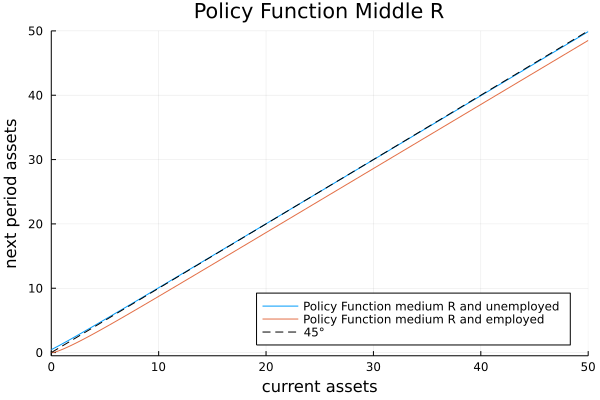

In [17]:
plot(A_grid,g.(A_grid,2,0),label="Policy Function medium R and unemployed")
plot!(A_grid,g.(A_grid,2,1),label="Policy Function medium R and employed")
plot!(A_grid,x->x,label="45°", color = :black, linestyle = :dash)
plot!(xlabel = "current assets", ylabel = "next period assets", title = "Policy Function Middle R"
    , xlim = (0.0, 50.0), ylim = (-0.5, 50.0), legend = :bottomright )

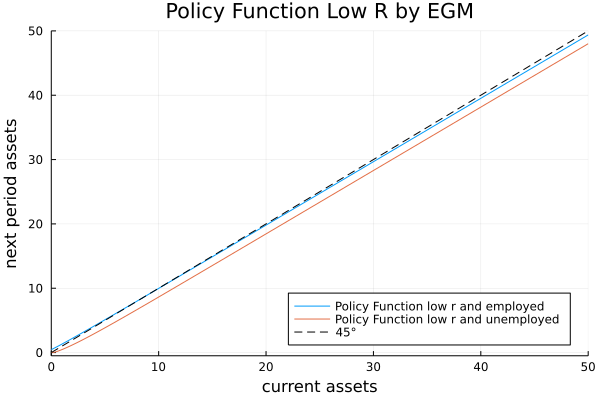

In [18]:
plot(A_grid,g.(A_grid,1,0),label="Policy Function low r and employed")
plot!(A_grid,g.(A_grid,1,1),label="Policy Function low r and unemployed")
plot!(A_grid,x->x,label="45°", color = :black, linestyle = :dash)
plot!(xlabel = "current assets", ylabel = "next period assets", title = "Policy Function Low R by EGM"
    , xlim = (0.0, 50.0), ylim = (-0.5, 50.0), legend = :bottomright )

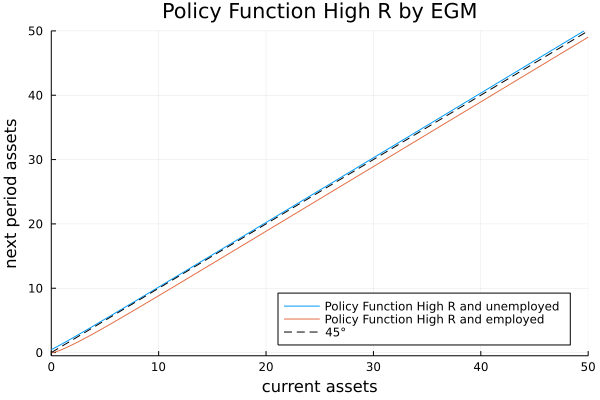

In [19]:
plot(A_grid,g.(A_grid,3,0),label="Policy Function High R and unemployed")
plot!(A_grid,g.(A_grid,3,1),label="Policy Function High R and employed")
plot!(A_grid,x->x,label="45°", color = :black, linestyle = :dash)
plot!(xlabel = "current assets", ylabel = "next period assets", title = "Policy Function High R by EGM"
    , xlim = (0.0, 50.0), ylim = (-0.5, 50.0), legend = :bottomright )

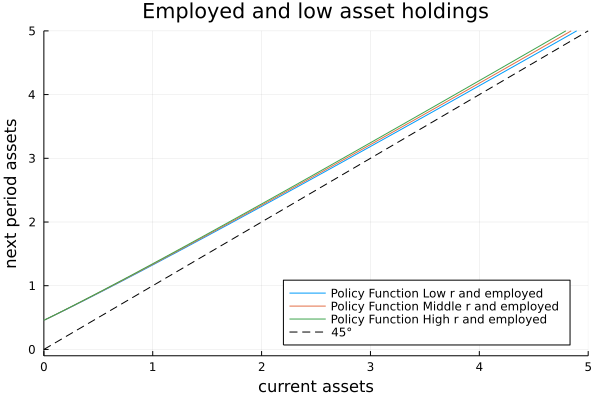

In [20]:
plot(A_grid,g.(A_grid,1,0),label="Policy Function Low r and employed")
plot!(A_grid,g.(A_grid,2,0),label="Policy Function Middle r and employed")
plot!(A_grid,g.(A_grid,3,0),label="Policy Function High r and employed")
plot!(A_grid,x->x,label="45°", color = :black, linestyle = :dash)
plot!(xlabel = "current assets", ylabel = "next period assets", title = "Employed and low asset holdings"
    , xlim = (0.0, 5.0), ylim = (-0.1, 5.0), legend = :bottomright )

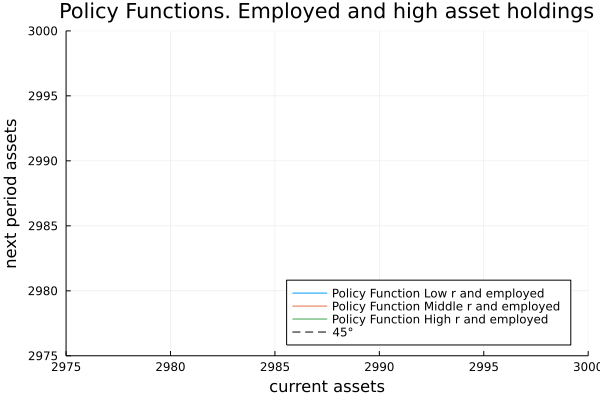

In [21]:
plot(A_grid,g.(A_grid,1,0),label="Policy Function Low r and employed")
plot!(A_grid,g.(A_grid,2,0),label="Policy Function Middle r and employed")
plot!(A_grid,g.(A_grid,3,0),label="Policy Function High r and employed")
plot!(A_grid,x->x,label="45°", color = :black, linestyle = :dash)
plot!(xlabel = "current assets", ylabel = "next period assets", title = "Policy Functions. Employed and high asset holdings"
    , xlim = (2975.0, 3000.0), ylim = (2975.0, 3000.0), legend = :bottomright )

Following [Young 2010](https://www.sciencedirect.com/science/article/abs/pii/S0165188909001316) I approximate $f(a|\epsilon)$ as 2 histograms grouped in a vector of dimension $2N_A\times1$, where $N_A$ is the number of grid points in the asset grid $A$.

It is not necessary to condition in $\theta$ since it is not correlated with the past, then $f(a|\epsilon,\theta)=f(a|\epsilon)Pr(\theta)$. This reduce the dimensionality of $d$ and the transition matrix.

Given the discretized distribution $d$ of size $2N_a\times 1$ and a policy function $g$ we can construct a transition matrix $T$ such that $d'=Td$. Where $T_{i,j}$ indicates how much of the mass located at $j$ should be transferred to $i$.

First, we apply the policy function for every $\theta$ to position $j$, where $j\in\{1,2,...2A_N\}$, that is $j$ represents a pair $(a,\epsilon)$. We use a policy correspondence $g(a,\epsilon)$ instead of the policy function $g(a,\epsilon,\theta)$.

Elements of $g(a,\epsilon)$ will not  be necessarily on the grid. For example, if the grid is $[-2,\;-1,\;0,\;1,\;2,\;3,\;4,\;...]$ and the policy function of a household returns a value of $2.25$... Where to allocate the mass of this household? Let say that this household has mass $m$, therefore the intuitive approach is to allocate $0.75m$ to the grid point $2$ and $0.25m$ to the grid point $3$. Then the second step is to build a correspondence $\Omega$ that takes $a$-values off grid and returns weights for each position on the grid. Specifically, let $\Omega:\mathbb{R}\rightarrow \mathbb{R}^{A_N}$, be a correspondence that gives a vector of 0s, except for the elements located at the position of the two nearest grid points (positions $i$ and $i+1$ such that $a_i<a'<a{i+1}) where assigns weights $\omega_i = |a_{i+1}-a'|/(a_{i+1}-a_i)$ and $\omega_{i+1}=|a_i-a'|/(a_{i+1}-a_i)$.

Third, we construct $T$ according to $T_{i,j} = \Omega(g(a_j))_i $Pr(\theta')\pi(\epsilon'|\epsilon)$ $ indicates how much of the mass located at $j$ should be transferred to $i$.using the known probabilities we compute the probability $Pr(\theta')\pi(\epsilon'|\epsilon)$


In [22]:
function allocate_mass(y_n, x_grid, grid_size)
       
    m = searchsortedfirst(x_grid, y_n)  # x_m > y_n > x_{m-1}
    m = min(m, grid_size)  # max = grid size.   If y_n > x_max => the above function returns max+1.  We don't wnat that 
    
    if isone(m)               # if y_n is too small that x_1 > y_n
        return 2, 0           # then we force m=2 and assign 0 weight  ( m-1 = 1 and its weight is 1)
    end
    
    x_m = x_grid[m]
    x_m_1 = x_grid[m-1]
    
    D_x = x_m - x_m_1
    
    peso_m = (y_n - x_m_1) / D_x      
    peso_m = min(max(peso_m, 0.0), 1.0)  # Por las dudas 

    return m, peso_m
end

allocate_mass (generic function with 1 method)

Given a discretized distribution $d$ of size $6N_a\times 1$ and a policy function $g$ we can construct a transition matrix $T$ such that $d'=Td$. Where $T_{i,j}$ indicates how much of the mass located at $j$ should be transferred to $i$.

First we apply the policy function in every state, we get a vector $G$ of dimension $6N_a\times 1$

Second, since some values of $a'=g(a,\theta,\epsilon)$ will be off-grid, say $a_i<a'<a_{i+1}$, we construct a correspondence $\Omega$ that works as a decision rule for allocating $a'$ to the grid. Specifically, let $\Omega:\mathbb{R}\rightarrow \mathbb{R}^{A_N}$, be a correspondence that gives a vector of 0s, except for the elements located at the position of the two nearest grid points (positions $i$ and $i+1$ such that $a_i<a'<a{i+1}) where assigns weights $\omega_i = |a_{i+1}-a'|/(a_{i+1}-a_i)$ and $\omega_{i+1}=|a_i-a'|/(a_{i+1}-a_i)$.

Third we construct $T$ according to $T_{i,j} = \Omega(g(a_j))_i $Pr(\theta')\pi(\epsilon'|\epsilon)$ $ indicates how much of the mass located at $j$ should be transferred to $i$.using the known probabilities we compute the probability $Pr(\theta')\pi(\epsilon'|\epsilon)$


Second, we take the current distribution $f_n$ and redistributed the current mass $f_n(a,\epsilon,\theta)$ to the $f_{n+1}$ distribution to the (four) elements represented by $(a',\epsilon')$ with weight represented by $\omega \pi_{\epsilon'|\epsilon}$.

Then, we can create a $6N_A\times6N_A$ transition matrix $T$, that will update the distribution $F$ to $F'$ according to the decripted rule $F′=TF$. That is using the policy function $g$ and the allocation function $\Omega$ to distribute the mass of $F$ to $F'$. 

How to construct $T$? Recall that acordingly to matrix multiplication we know that $D'_i=\sum_{j=1}^{3N_A}T_{i,j}D_{j}$, that implies that $T_{i,j}$ indicates how much of the mass ubicated in $j$ should be tranferred to $i$. Acording to the above discussion for $j\leq N_A$ we have $T_{i,j}=\pi_T(i|e)\Omega(G_j)_i$, where $\pi_T$ is the conditional probability considering $i\leq N_A$ as $e$ or $u$ otherwise.

Thus we can construct $T$, which is a trnasition matrix. Moreover it is a transition matrix of a Markov chain, since it works with discrete distributions, then we can compute the stationary distribution $F^*$, given by the Eigen-vector of $T$ associated with the unit Eigen-value normalized to sum to one.

I used a very simimlar implementation of [Julien Pascal's code](https://julienpascal.github.io/post/aiyagariaggregateuncertainty/) and I found his code very useful.

In [23]:
function transition_mat(g::Function, asset_grid::Array, a_N::Int64)
    T = fill(0.0,(2*a_N,2*a_N))
    
    # Loop current period asset holdings:
    for n = 1:a_N
        a = asset_grid[n]
        # Loop over current employment state:
        for ε = 0:1
            # Loop over current interest rate state:
            for  θ in 1:3
            
                y_n = g(a,θ,ε)                    
                m, peso_m = allocate_mass(y_n, asset_grid, a_N)      #  x_m > y_n > x_{m-1}

                current_pos = ε*a_N + n
                # Loop over the possible next employment state
                for ε_next in 0:1
                    next_pos = ε_next*a_N + m
                    # weight on the grid point above 
                    T[next_pos,   current_pos] += peso_m     * Pε[ε+1 ,ε_next+1] * Pr[θ]
                    # weight on the grid point below 
                    T[next_pos-1, current_pos] += (1-peso_m) * Pε[ε+1 ,ε_next+1] * Pr[θ]
                end
            end
        end
    end
    return T
end

transition_mat (generic function with 1 method)

In [24]:
# Function to find the index corresponding to the closest value on a grid:
# Source: https://discourse.julialang.org/t/findnearest-function/4143/4
function nearest(x,grid)
    idx = searchsortedfirst(grid,x)
    if (idx==1); return idx; end
    if (idx>length(grid)); return length(grid); end
    if (grid[idx]==x); return idx; end
    if (abs(grid[idx]-x) < abs(grid[idx-1]-x))
      return idx
    else
      return idx-1
    end
end

nearest (generic function with 1 method)

In [25]:
function stationary_dist(T)

    T_eigen = eigen(T) # eigen values and eigen vectors
    
    eigenvalues_real = real(T_eigen.values) # take the real part of the eigen-values
    
    i = nearest(1.0, eigenvalues_real) # where is the nearest eigen value to 1 ?
    
    eigenvector_real = real(T_eigen.vectors[:,i]) # Select the corresponding eigenvector
    
    F = eigenvector_real/sum(eigenvector_real) # Normalize it
    f1 = F[1:a_n]
    f2 = F[a_n+1:2*a_n]
    
    return [f1 , f2]
    
end

stationary_dist (generic function with 1 method)

In [26]:
# STEP 4: Computing the stationary distribution
T = transition_mat(g,A_grid,a_n);

In [27]:
f1, f2 = stationary_dist(T)
f1n = f1 ./ sum(f1)
f2n = f2 ./ sum(f2)
;

In [ ]:
plot( A_grid,f1,label="employed", xlim=(0,200)) # xlim=(a_min_0,500)
plot!(A_grid,f2,label="unemployed")

In [30]:
# STEP 5: Comparing distribution's agreggate K 
@show sum(f2)
@show Nss

K_agg = sum( f2 .* A_grid .+  f1 .* A_grid  )
@show K_0
@show K_agg;

sum(f2) = 0.08003679852805895
Nss = 0.9199632014719411
K_0 = 22.395977273268073
K_agg = 21.836992858144942


Once we have the stationary distribution we should check if the guessed valued for $K_0$ corresponds with the resulting value for $K_0'$ acording to the distribution.

Claramente, el capital propuesto es incompatible con la distribución de la riqueza que genera.

### Finding Aggregate Capital

We do it with the Brent Method implemented by ```Omptim``` Package

In [42]:
function Exeso_DK_cuadrado(K_in, g_0, max_iter, tol)
    
    # Rates
    r_in = [rl(K_in) rm(K_in) rh(K_in)]; w_in = w(K_in); s_in = s(K_in); τ_in = τ(K_in);
    
    # Asset grid
    #a_min_in = a_min(K_in)
    #A_grid = collect(range(0, stop=(a_max-a_min_in)^(0.5), length=a_n)).^2 .+ a_min_in
    #A_mat = repeat(A_grid, outer=[1, 6])'
    
    # Policy function
    g_old_in = g_0 #g_old_in(a,θ,ε) = a+0*θ*ε
    #g_new_in(a,θ,ε) = a+0*θ*ε
    A_old_in = A_mat
    for it in 1:max_iter
        global A_new_in, g_new_in = EGM(g_old_in, r_in, w_in, τ_in, s_in, 0.0, Pε, Pr, A_mat, A_grid)
        distance_in = norm(A_new_in - A_old_in, Inf)      
        if distance_in < tol; break; end;
        A_old_in = copy(A_new_in) 
        g_old_in = g_new_in
    end
    g_out = g_new_in
    
    # Stationary distribution 
    T_out = transition_mat(g_out, A_grid, a_n)
    fe_out, fu_out = stationary_dist(T_out)
    
    # Agregate Capital
    K_out = sum( fe_out .* A_grid  +  fu_out .* A_grid  )

    return 0.5*(K_in - K_out)^2
    
end

Exeso_DK_cuadrado (generic function with 2 methods)

In [43]:
@show 0.5*(K_0 - K_agg)^2

a_max = 250
a_n = 200
max_iter=5000
tol=1e-7
g_0(a,θ,ε) = a+0*θ*ε
K_ej = K_0

# Checkeo
Exeso_DK_cuadrado(K_ej, g_0, max_iter, tol)

0.5 * (K_0 - K_agg) ^ 2 = 0.1562317881752745


0.1562317881752745

In [44]:
# Asset grid
a_min_0 = 0.0
a_max = 300
a_n = 500
A_grid = collect(range(0, stop=(a_max-a_min_0)^(0.5), length=a_n)).^2 .+ a_min_0
A_mat = repeat(A_grid, outer=[1, 6])'

# EGM
g_0(a,θ,ε) = a+0*θ*ε
max_iter=5000
tol=1e-7

# Stationary Equilibrium
@time eq_stacionario = optimize(K -> Exeso_DK_cuadrado(K, g_0, max_iter, tol), 10, 50, Brent())
K_ss = eq_stacionario.minimizer
println("Steady-state value of capital K* = $(K_ss)")

 34.447580 seconds (81.48 M allocations: 5.331 GiB, 2.57% gc time, 1.88% compilation time)
Steady-state value of capital K* = 22.34958700085819


In [45]:
K_ss_original = K_ss

22.34958700085819

r_ss = [rl(K_ss) rm(K_ss) rh(K_ss)] = [0.026585097058309397 0.03740191111937426 0.048218725180439126]
rE_ss = r(K_ss) = 0.04172863674380021
w_ss = w(K_ss) = 2.018178757422908
s_ss = s(K_ss) = 0.5166537619002645
τ_ss = τ(K_ss) = 0.014825148829582073
a_min_ss = a_min(K_ss) = 0.0
β * (1 + r(K_ss) * (1 - τ_ss)) = 0.999465603353873
sum(fe_ss) = 0.9199632014719413
Nss = 0.9199632014719411
K_ss = 22.34958700085819
K_agg2 = 22.34959264516442


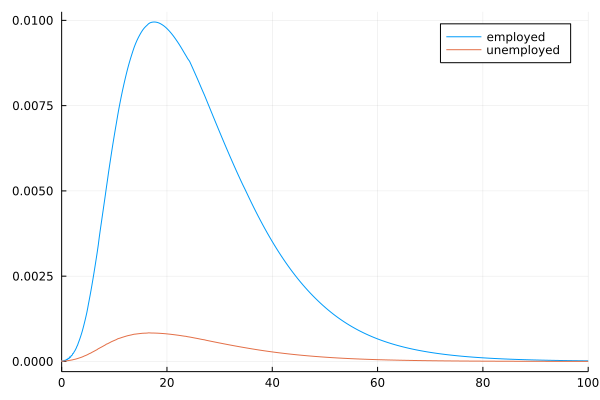

In [46]:
# Stationary Equilibrium Prices
@show r_ss = [rl(K_ss) rm(K_ss) rh(K_ss)]
@show rE_ss = r(K_ss)
@show w_ss = w(K_ss)
@show s_ss = s(K_ss)
@show τ_ss = τ(K_ss)
@show a_min_ss = a_min(K_ss)
@show β*(1+r(K_ss)*(1-τ_ss))
;

# SS policy function
g_0(a,θ,ε) = a+0*θ*ε
g_old = g_0
A_grid = collect(range(0, stop=(a_max-a_min_ss)^(0.5), length=a_n)).^2 .+ a_min_ss
A_mat = repeat(A_grid, outer=[1, 6])'
A_old = A_mat
for it in 1:max_iter
    global A_new, g_new = EGM(g_old, r_ss, w_ss, τ_ss, s_ss, a_min_ss, Pε, Pr, A_mat, A_grid)
    distance = norm(A_new - A_old, Inf)      #maximum(abs.(A_new - A_old)) 
    if distance < tol ;   break;    end      # Check for convergence
    A_old = copy(A_new) 
    g_old = g_new 
end
g_ss = g_new

# SS Distribution
T_ss = transition_mat(g_ss, A_grid, a_n)
fe_ss, fu_ss = stationary_dist(T_ss)
@show sum(fe_ss)
@show Nss
K_agg2 = sum( fe_ss .* A_grid  +  fu_ss .* A_grid  )
@show K_ss
@show K_agg2;
plot(A_grid,fe_ss,label="employed", xlim=(a_min_ss,100))
plot!(A_grid,fu_ss,label="unemployed")

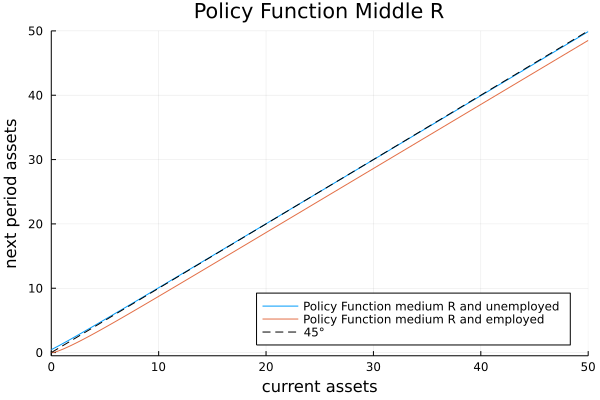

In [47]:
plot(A_grid,g_ss.(A_grid,2,0),label="Policy Function medium R and unemployed")
plot!(A_grid,g_ss.(A_grid,2,1),label="Policy Function medium R and employed")
plot!(A_grid,x->x,label="45°", color = :black, linestyle = :dash)
plot!(xlabel = "current assets", ylabel = "next period assets", title = "Policy Function Middle R"
    , xlim = (0.0, 50.0), ylim = (-0.5, 50.0), legend = :bottomright )

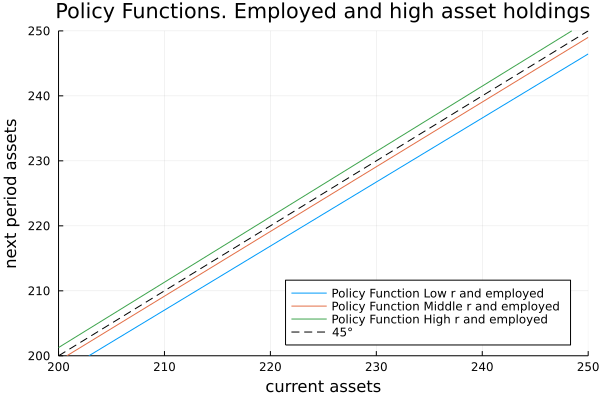

In [48]:
plot(A_grid,g.(A_grid,1,0),label="Policy Function Low r and employed")
plot!(A_grid,g.(A_grid,2,0),label="Policy Function Middle r and employed")
plot!(A_grid,g.(A_grid,3,0),label="Policy Function High r and employed")
plot!(A_grid,x->x,label="45°", color = :black, linestyle = :dash)
plot!(xlabel = "current assets", ylabel = "next period assets", title = "Policy Functions. Employed and high asset holdings"
    , xlim = (200.0, 250.0), ylim = (200.0, 250.0), legend = :bottomright )

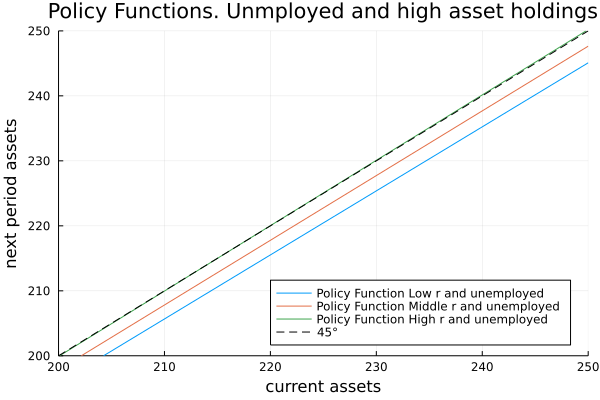

In [53]:
plot(A_grid,g_ss.(A_grid,1,1),label="Policy Function Low r and unemployed")
plot!(A_grid,g_ss.(A_grid,2,1),label="Policy Function Middle r and unemployed")
plot!(A_grid,g_ss.(A_grid,3,1),label="Policy Function High r and unemployed")
plot!(A_grid,x->x,label="45°", color = :black, linestyle = :dash)
plot!(xlabel = "current assets", ylabel = "next period assets", title = "Policy Functions. Unmployed and high asset holdings"
    , xlim = (200.0, 250.0), ylim = (200.0, 250.0), legend = :bottomright )